# Visualise your datasets with _Matplotlib_

This lab we will focus on using data visualisation techniques to analyse and understand further your loaded datasets. Refer to these (matplotlib tutorials)[https://matplotlib.org/stable/tutorials/index.html] and the Matplotlib documentation for more help.

We will be working with a calcium dataset

In [10]:
!pip install matplotlib
!pip install plotly

In [11]:
!pip install jupyter anywidget

In the previous worksheets we learned how to load a dataset. Time to explore an actual 2p microscope output. Yes. You are about to explore a calcium imaging dataset for one neuron. 

In [12]:
#import and load the right library
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 

This dataset is in a different format. It is not a .csv nor a .json, so we will need to use a different library to open this .mat file. 


In [13]:
# calcium dataset -> load
mat = scipy.io.loadmat("1140_20190613_9_timeseries.mat")

#see the content of the file
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Oct 03 10:01:39 2019', '__version__': '1.0', '__globals__': [], 'licks': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'reward': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'punish': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'meanF': array([[332.39277344, 330.70492188, 329.87941406, ..., 326.10996094,
        324.41738281, 324.25089844]]), 'dff': array([[ 0.31500247, -0.04055977, -0.04535041, ..., -0.36796749,
         0.0655892 ,  0.13961023]]), 'cues': array([[0, 0, 1, ..., 0, 0, 0]], dtype=uint8), 'go': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'nogo': array([[0, 0, 1, ..., 0, 0, 0]], dtype=uint8)}


Let's check what type of data this is

In [14]:
#inspect the structure of the loaded dataset 
type(mat)

dict

This is a dictionary, let's inspect it in a different way

In [15]:
# See what variables are in the file
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'licks', 'reward', 'punish', 'meanF', 'dff', 'cues', 'go', 'nogo'])


**variables**
- 'licks':  represent at what point the mouse licked
-  'reward', 'punish': represent at what point the mouse received a reward or punishment
-  'dff': represents the activity of the neuron
-  'go', 'nogo': represent the type of cue received

In [16]:
# let's check what this data looks like
ts = mat['dff']
print(type(ts), ts.shape)

<class 'numpy.ndarray'> (1, 10373)


Think about what you learned about numpy and arrays, what could this mean?

<class 'numpy.ndarray'> (1, 10373)

In this case, it's neurons x time. So 1 neuron, and 10373 time points.


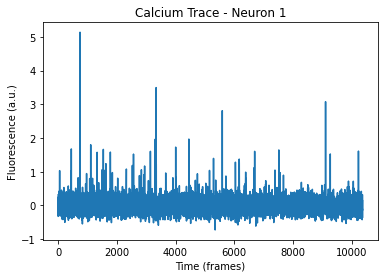

In [17]:
# Let's see this neuron's activity
plt.plot(ts[0])
plt.title("Calcium Trace - Neuron 1")
plt.xlabel("Time (frames)")
plt.ylabel("Fluorescence (a.u.)")
plt.show()

On its own, this doesn't tell us much, let's inspect what other data we have!

In [18]:
rew = mat['reward']
print(type(rew), rew.shape)

pun= mat['punish']
print(type(pun), pun.shape)

<class 'numpy.ndarray'> (1, 10373)
<class 'numpy.ndarray'> (1, 10373)


In [19]:
# let's flatten to 1D arrays 
reward_signal = rew.flatten()
punish_signal = pun.flatten()

print(reward_signal)
print( punish_signal)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


This means that each frame (out of 10,373) has:

- 1 if a reward or punishment occurred at that timepoint

- 0 if not.

In [20]:
#now we extract the time points where the reward and punishment == 1, and store them as lists
reward_times = list(np.where(reward_signal == 1)[0])
punishment_times = list(np.where(punish_signal == 1)[0])



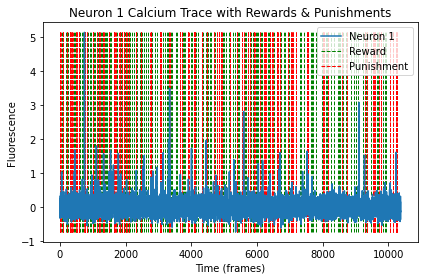

In [21]:
fig, ax = plt.subplots()
ax.plot(ts[0], label='Neuron 1')

# Overlay vertical lines at reward/punishment times
ax.vlines(reward_times, ymin=min(ts[0]), ymax=max(ts[0]), color='green', linestyle='--', linewidth=1, label='Reward')
ax.vlines(punishment_times, ymin=min(ts[0]), ymax=max(ts[0]), color='red', linestyle='--', linewidth=1, label='Punishment')

ax.set_title("Neuron 1 Calcium Trace with Rewards & Punishments")
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Fluorescence")
ax.legend()
plt.tight_layout()
plt.show()

This plot is a bit too small, but you can modify the size of the plot by modifying `fig, ax = plt.subplots(figsize=(30, 6)) `

Give it a try!

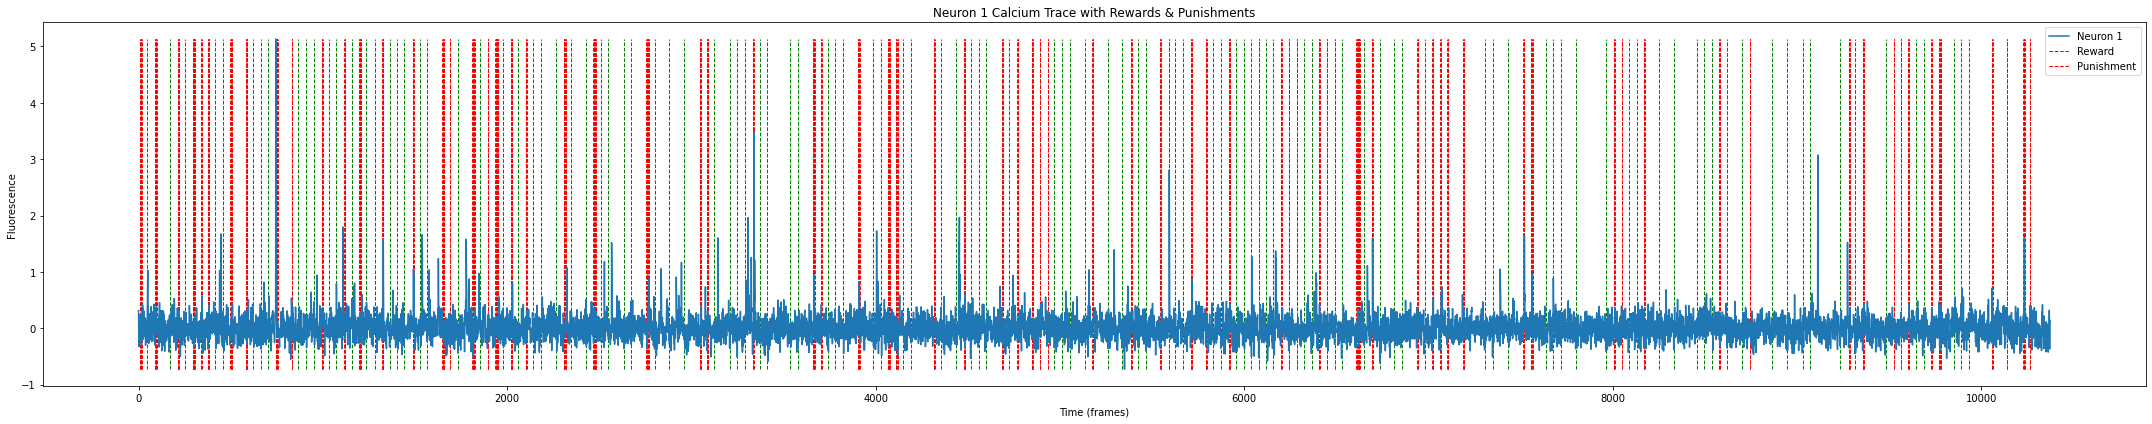

In [22]:
fig, ax = plt.subplots(figsize = (30,6))
ax.plot(ts[0], label='Neuron 1')

# Overlay vertical lines at reward/punishment times
ax.vlines(reward_times, ymin=min(ts[0]), ymax=max(ts[0]), color='green', linestyle='--', linewidth=1, label='Reward')
ax.vlines(punishment_times, ymin=min(ts[0]), ymax=max(ts[0]), color='red', linestyle='--', linewidth=1, label='Punishment')

ax.set_title("Neuron 1 Calcium Trace with Rewards & Punishments")
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Fluorescence")
ax.legend()
plt.tight_layout()
plt.show()

Better but not good enough to get anything meaningful out of this!
Let's try something else.

In this case we already have our variables:
-  ts[0], which is the calcium trace for our neuron;
-  reward_times         → list of time indices where reward == 1
-  punishment_times     → list of time indices where punish == 1

Now we are going to use a different library, plotly. 

In [23]:
# let's import the library 
import plotly.graph_objects as go

Plotly is a library that allows us to visualise data in a more interactive way. It is different from matplotlib, let's see why.

In [24]:
# Step 1: Create figure
fig = go.Figure()

In [25]:
# Step 2: Add calcium trace line
fig.add_trace(go.Scatter(
    y=ts[0], mode='lines', name='Neuron 1',
    line=dict(color='blue')
))

In [26]:
# Step 3: Add reward markers (green dashed lines)
for t in reward_times:
    fig.add_vline(
        x=t,
        line=dict(color='green', width=1, dash='dash'),
        annotation_text='Reward',
        annotation_position='top left',
        opacity=0.5
    )

In [27]:
# Step 4: Add punishment markers (red dotted lines)
for t in punishment_times:
    fig.add_vline(
        x=t,
        line=dict(color='red', width=1, dash='dot'),
        annotation_text='Punishment',
        annotation_position='top right',
        opacity=0.5
    )

In [28]:
# Step 5: Put everything together and define the Layout settings
fig.update_layout(
    title='Neuron 1 Calcium Trace with Reward and Punishment Events',
    xaxis_title='Time (frames)',
    yaxis_title='Fluorescence (a.u.)',
    width=1200,
    height=500,
    template='plotly_white'
)
fig.show()

The beauty of plotly is that you can zoom in and out and scroll, as well as adding different variables like building blocks!

On its own, this plot tells you the activity of this specific neuron in the presence of reward/punishment. 


**Now, go back to the data you have about the neuron, can you plot anything else that can give us more information?**

In [29]:
#Hint, you can plot the type of cue (go / nogo) and at what point the mouse licked